In [3]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2
from skimage.metrics import structural_similarity as ssim


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [5]:
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

In [6]:

np.random.seed(0)

x = np.array(Image.open('../../testset/10081.jpg'))/255.
# x = np.array(Image.open('../../testset/12003.jpg'))/255.

rows,cols,_ = np.shape(x)
delta= 0.05
# print(np.random.normal(0,1,x.shape).shape)
z = x+ delta*np.random.normal(0,1,x.shape)



In [15]:

## Without GGS
slpam_l1_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=5,
        lamb=2e-2,
        stop_criterion=1e-4,
        MaximumIteration=100,
        method="SLPAM",
        noised_image_input=z,
        optD="OptD",
        dk_SLPAM_factor=1e-4,
        A=np.ones((rows,cols)))

palm_l1_solver = DMS(
        norm_type="l1",
        edges="similar",
        beta=5,
        lamb=5e-2,
        stop_criterion=1e-4,
        MaximumIteration=150,
        method="PALM",
        noised_image_input=z,
        optD="OptD",
        A=np.ones((rows,cols)))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


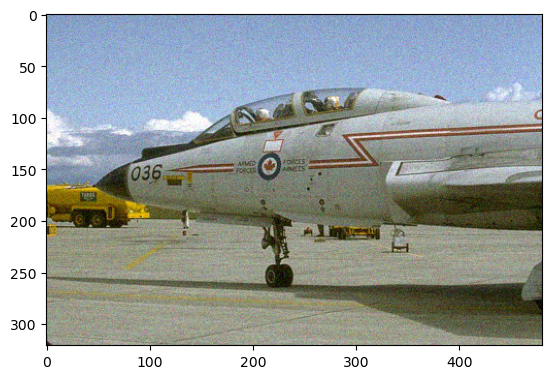

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.31it/s]


In [16]:
plt.figure()
plt.imshow(z)
plt.show()

time2 = time.time()
out_slpam_l1_solver = slpam_l1_solver.process()
time_slpam_l1 = time.time()-time2

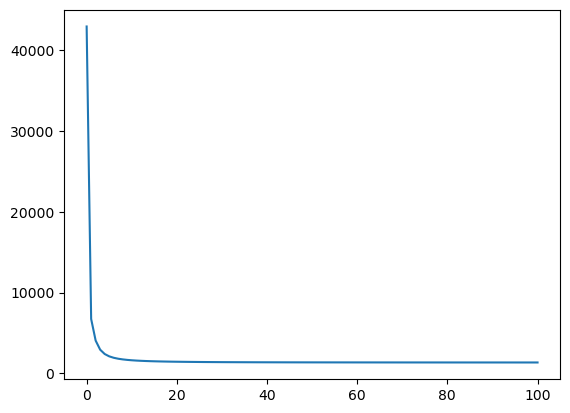

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


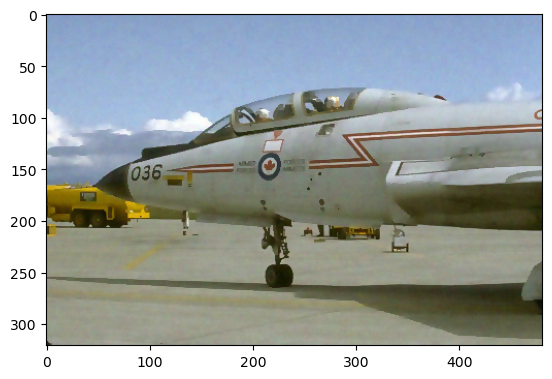

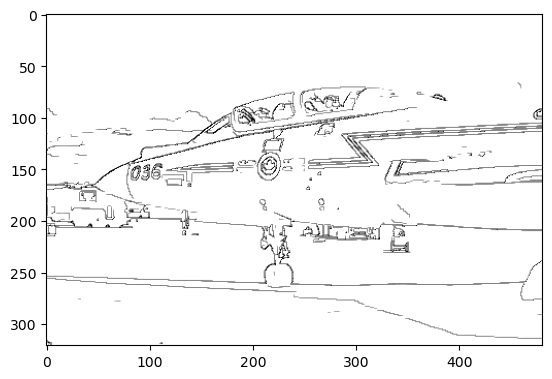

In [17]:
plt.figure()
plt.plot(out_slpam_l1_solver[2])
plt.show()
plt.figure()
plt.imshow(out_slpam_l1_solver[1])
plt.show()
plt.figure()
plt.imshow(out_slpam_l1_solver[0][:,:,0]+out_slpam_l1_solver[0][:,:,1],cmap='gray_r')
plt.show()

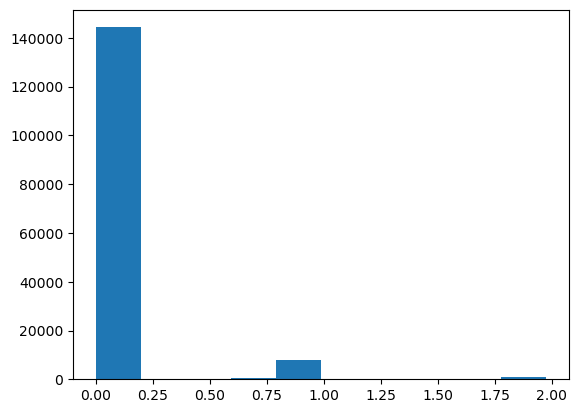

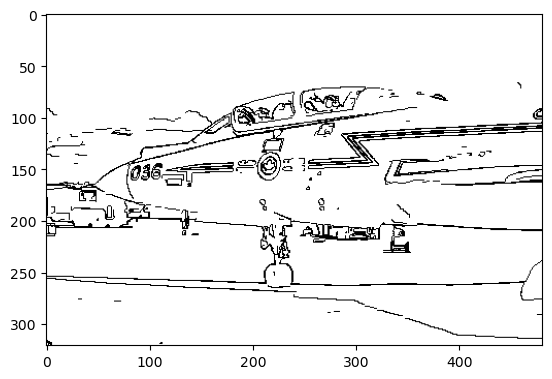

In [19]:
edge = out_slpam_l1_solver[0][:,:,0]+out_slpam_l1_solver[0][:,:,1]
plt.figure()
plt.hist(edge.flatten())
plt.show()
plt.figure()
plt.imshow(edge>0.02,cmap='gray_r')
plt.show()